In [1]:
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
print("Loading best model + test results...")

bundle = joblib.load("../results/model_results.joblib")

metrics_logged = bundle["metrics"]
y_test = bundle["y_test"]
y_pred_log = bundle["y_pred"]

model_name = metrics_logged["model"]

print("Loaded model:", model_name)
print("Logged metrics:", metrics_logged)


Loading best model + test results...
Loaded model: XGBoost_tuned
Logged metrics: {'model': 'XGBoost_tuned', 'rmse': 1.365377685333351, 'mae': 0.4712433509534344, 'r2': 0.38352085030338934}


In [3]:
y_test_price = np.expm1(y_test)
y_pred_price = np.expm1(y_pred_log)

# Compute real-price metrics
rmse_real = np.sqrt(mean_squared_error(y_test_price, y_pred_price))
mae_real = mean_absolute_error(y_test_price, y_pred_price)
mape_real = np.mean(np.abs((y_test_price - y_pred_price) / y_test_price)) * 100

print("\n--- REAL PRICE METRICS ---")
print("RMSE (price):", rmse_real)
print("MAE (price):", mae_real)
print("MAPE (%):", mape_real)


--- REAL PRICE METRICS ---
RMSE (price): 8471868.230180988
MAE (price): 3898674.939287894
MAPE (%): inf


/tmp/ipykernel_4832/4062448826.py:7: RuntimeWarning: divide by zero encountered in divide
  mape_real = np.mean(np.abs((y_test_price - y_pred_price) / y_test_price)) * 100


In [4]:
final_metrics = {
    "model": model_name,
    "rmse_log": metrics_logged["rmse"],
    "mae_log": metrics_logged["mae"],
    "r2_log": metrics_logged["r2"],
    "rmse_price": rmse_real,
    "mae_price": mae_real,
    "mape_price": mape_real
}

In [5]:
os.makedirs("../results", exist_ok=True)
joblib.dump(final_metrics, "../results/final_metrics.joblib")

print("\nSaved → results/final_metrics.joblib")



Saved → results/final_metrics.joblib


In [6]:
os.makedirs("../results/figures", exist_ok=True)

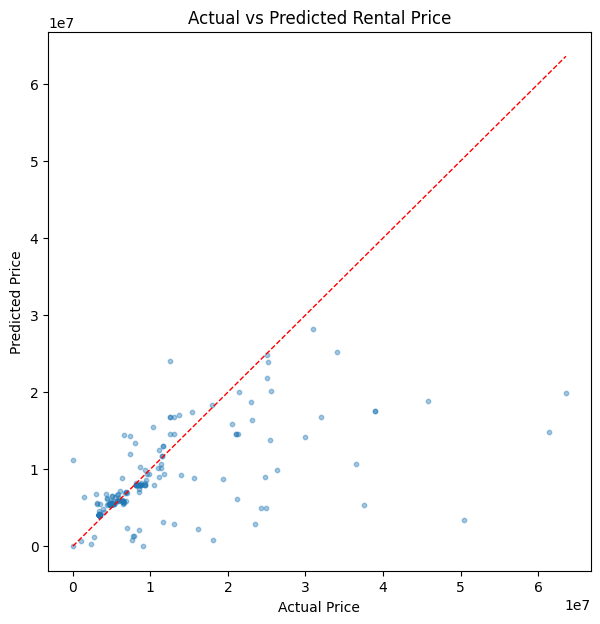

In [8]:
plt.figure(figsize=(7,7))
plt.scatter(y_test_price, y_pred_price, alpha=0.4, s=10)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Rental Price")
plt.plot([0, max(y_test_price)], [0, max(y_test_price)], 'r--', linewidth=1)
plt.savefig("../results/figures/actual_vs_predicted_price.png")
plt.show()

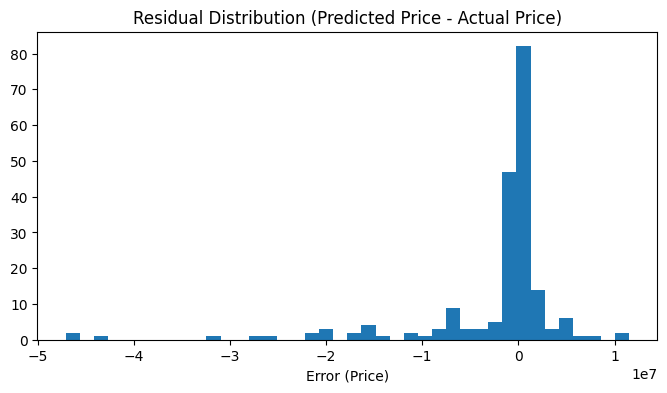

In [9]:
residuals_price = y_pred_price - y_test_price

plt.figure(figsize=(8,4))
plt.hist(residuals_price, bins=40)
plt.title("Residual Distribution (Predicted Price - Actual Price)")
plt.xlabel("Error (Price)")
plt.savefig("../results/figures/residuals_price.png")
plt.show()

In [10]:
df_results = pd.DataFrame({
    "actual_price": y_test_price,
    "predicted_price": y_pred_price,
    "error": residuals_price,
    "error_abs": np.abs(residuals_price)
})

df_results.to_csv("../results/final_predictions.csv", index=False)
print("Saved → results/final_predictions.csv")

Saved → results/final_predictions.csv


In [12]:
summary_text = f"""
FINAL MODEL REPORT 

Best Model: {model_name}

Log-space performance:
- RMSE (log): {metrics_logged['rmse']:.4f}
- MAE (log): {metrics_logged['mae']:.4f}
- R² (log): {metrics_logged['r2']:.4f}

Real-price performance:
- RMSE (price): {rmse_real:.2f}
- MAE (price): {mae_real:.2f}
- MAPE: {mape_real:.2f}% 

Interpretation:
The MAE indicates that, on average, the model is off by ≈ {mae_real:.0f} units of price.

IMPORTANT NOTE ABOUT MAPE:
The MAPE value appears as 'inf%' because some properties in the dataset 
have actual_price = 0. Since MAPE divides by the true value, division by zero 
makes the metric undefined. For this reason, MAPE is not suitable for this dataset.
Instead, RMSE, MAE, and R² (especially in log-space) provide the correct evaluation.

All figures and predictions have been exported to the results/ folder.
"""

with open("../results/final_report_summary.txt", "w") as f:
    f.write(summary_text)

print("\nSaved → results/final_report_summary.txt")
print("\n--- SUMMARY ---")
print(summary_text)
print("\nNotebook complete.")



Saved → results/final_report_summary.txt

--- SUMMARY ---

FINAL MODEL REPORT 

Best Model: XGBoost_tuned

Log-space performance:
- RMSE (log): 1.3654
- MAE (log): 0.4712
- R² (log): 0.3835

Real-price performance:
- RMSE (price): 8471868.23
- MAE (price): 3898674.94
- MAPE: inf% 

Interpretation:
The MAE indicates that, on average, the model is off by ≈ 3898675 units of price.

IMPORTANT NOTE ABOUT MAPE:
The MAPE value appears as 'inf%' because some properties in the dataset 
have actual_price = 0. Since MAPE divides by the true value, division by zero 
makes the metric undefined. For this reason, MAPE is not suitable for this dataset.
Instead, RMSE, MAE, and R² (especially in log-space) provide the correct evaluation.

All figures and predictions have been exported to the results/ folder.


Notebook complete.
